# Part 1

## Intorduction

### Background:

This project aims to develop a robust predictive model to identify individuals at risk of diabetes based on key health indicators such as Glucose levels, Blood Pressure, BMI, and other relevant variables. The process begins with thorough data exploration and descriptive analysis, addressing missing values and understanding variable relationships through visualizations like histograms, scatter plots, and correlation heatmaps. Following this, various classification algorithms are implemented and compared, with a focus on optimizing model performance through strategic hyperparameter tuning. The final step involves creating an interactive Tableau dashboard to present the analysis and insights, providing actionable information to aid in early diabetes detection and management.

### Environment Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import scipy.stats as stats


import warnings
warnings.filterwarnings('ignore')

### Data loading

In [2]:
df_raw = pd.read_csv("health care diabetes.csv")
df = df_raw.copy()
df.rename(columns={'Outcome' : 'Target'}, inplace=True)

## Data Exploration and Preprocessing:



### About Dataset:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Content:
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

Sources:
(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader Applied Physics Laboratory
The Johns Hopkins University Johns Hopkins Road Laurel, MD 20707 (301) 953-6231 (c) Date received: 9 May 1990

Accessed from Keggle https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data on September 2023




In [3]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
371,0,118,64,23,89,0.0,1.731,21,0
578,10,133,68,0,0,27.0,0.245,36,0
572,3,111,58,31,44,29.5,0.430,22,0
114,7,160,54,32,175,30.5,0.588,39,1
197,3,107,62,13,48,22.9,0.678,23,1


In [4]:
df.shape


(768, 9)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Target                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Basic Statistical Analysis:

In [6]:
# Analyze the target variable
target = df['Target']

# 1. Missing Values
missing_values = target.isnull().sum()
missing_ratio = missing_values / len(target)
print(f'Missing Values: {missing_values} ({missing_ratio:.2%})')

# 2. Distribution
distribution = target.value_counts(normalize=True)
print(f'\nTarget Distribution:\n{distribution}')

Missing Values: 0 (0.00%)

Target Distribution:
Target
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [7]:
df.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Target,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Missing Data:

Although there are no null values, variables like Glucose, BloodPressure, SkinThickness, Insulin, and BMI contain zeros, which indicate missing values. and need to be treated to avoid skewing the results.

In [8]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NAN)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Target,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
df.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Target                       0.000000
dtype: float64

After replacing zeros with NaN in key columns, the statistics reveal the following:

- Count: Significant missing values are now identified, especially in SkinThickness (227) and Insulin (374).

- Mean: Slight increases across all variables indicate that zeros were skewing the data, and the true averages are now more accurately represented.

- Standard Deviation: Most variables show reduced variability, except Insulin, which has a slightly increased spread, indicating a wider range of values after excluding zeros.

- Percentiles and Min/Max Values: The minimum values have increased, confirming zeros as incorrect data. The percentiles have shifted, reflecting a more realistic distribution.

- Missingness:
    - High: Insulin and SkinThickness, Nearly half of the Insulin data and a substantial portion of SkinThickness data are missing
    - Moderate: BloodPressure
    - Minimal: Glucose and BMI

<Axes: >

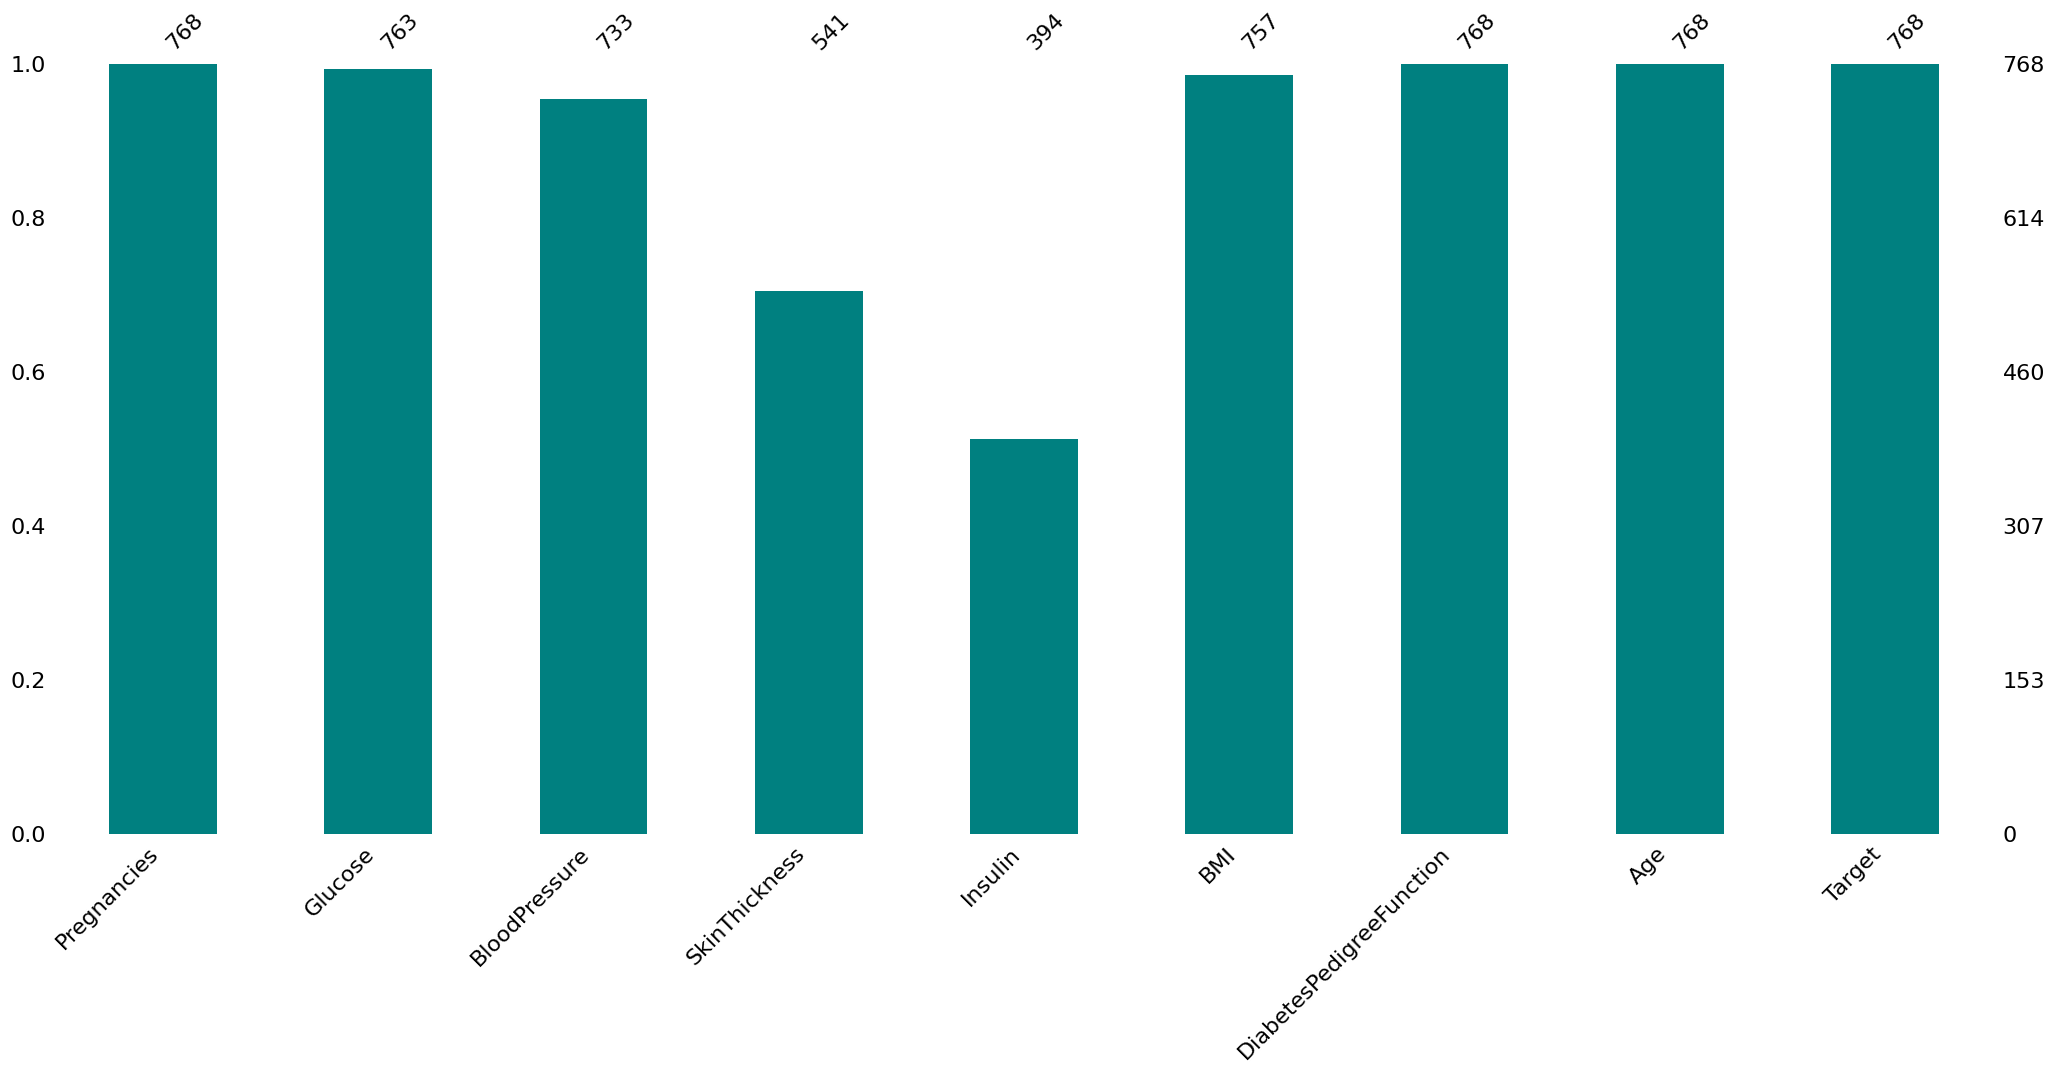

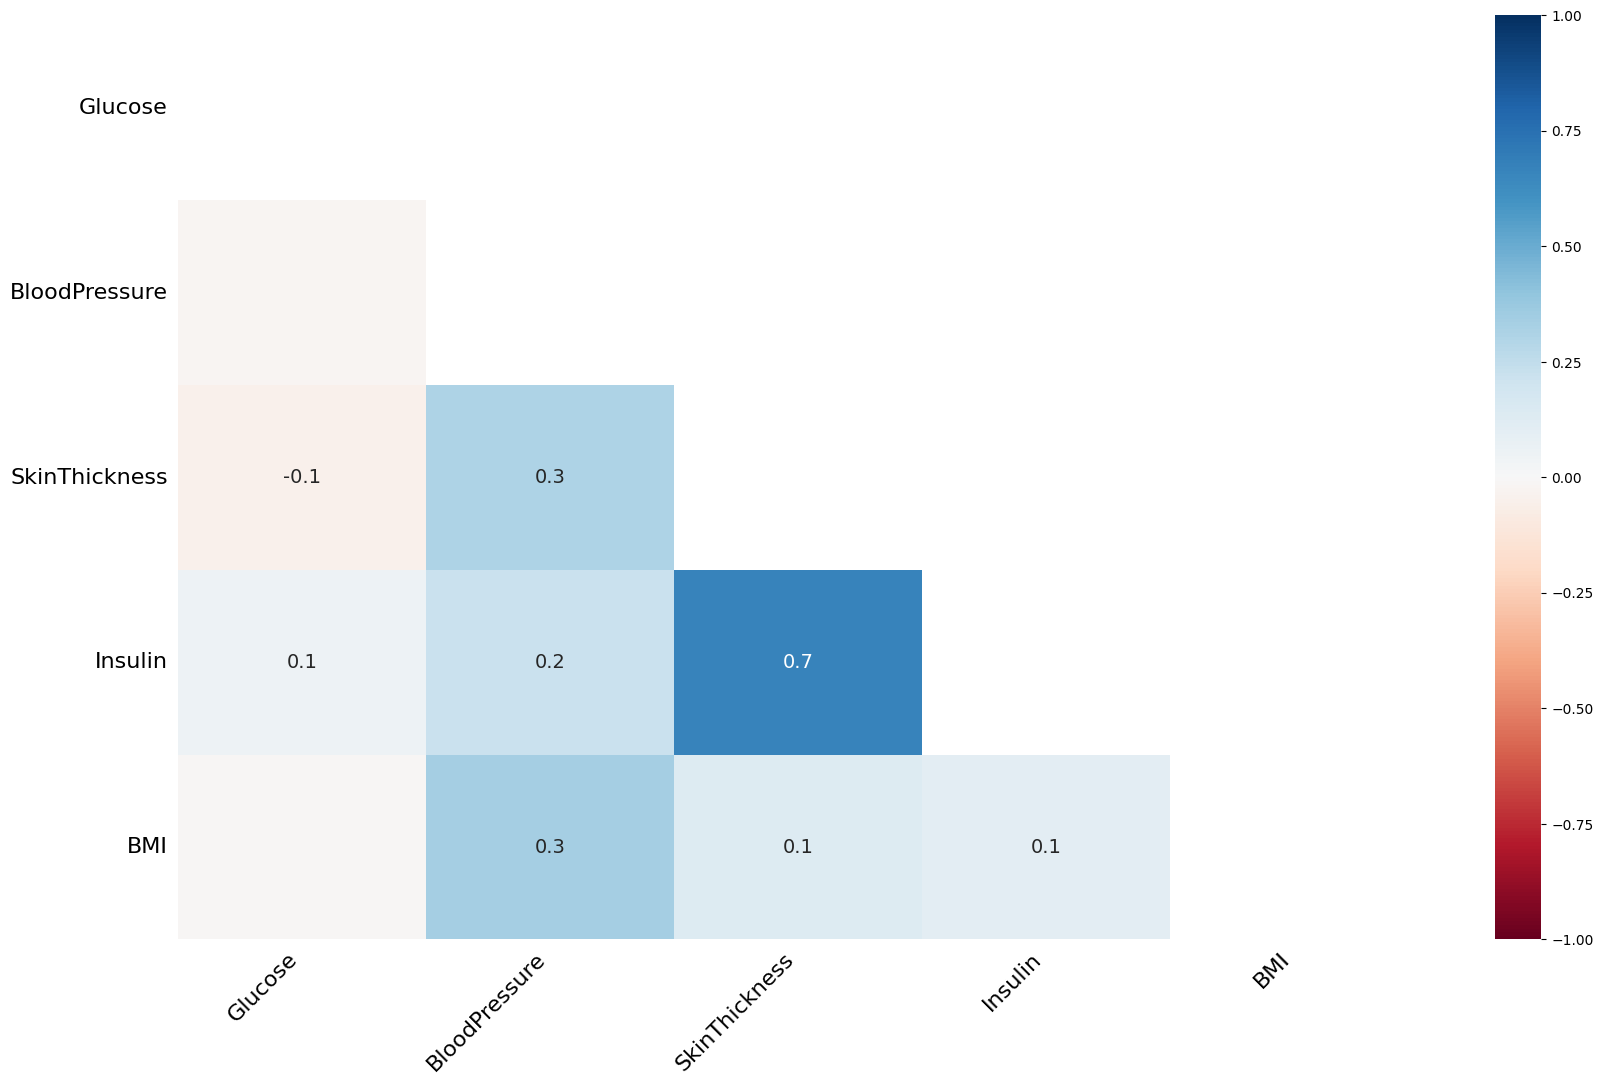

In [11]:


msno.bar(df, color="teal")
msno.heatmap(df) # Show correlation of missingness between variables


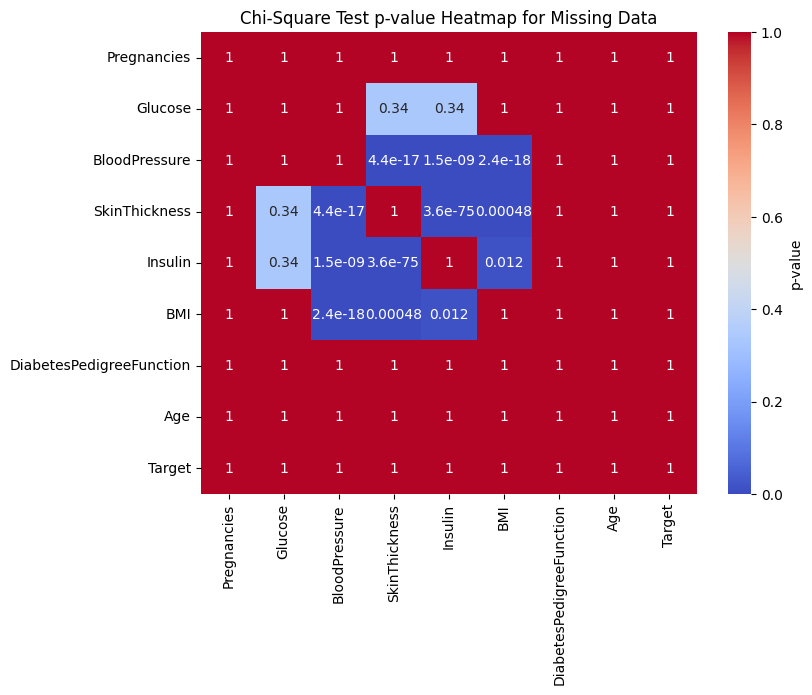

In [12]:
from scipy.stats import chi2_contingency


def chi_square_p_value_matrix(data):
    """
    Compute a matrix of p-values for chi-square tests of independence between
    the missingness patterns of each pair of features.

    Parameters:
    data : pandas.DataFrame
        DataFrame containing the dataset with missing values.

    Returns:
    p_value_matrix : pandas.DataFrame
        DataFrame where each cell contains the p-value of the chi-square test between
        the corresponding pair of features.
    """
    features = data.columns
    n = len(features)
    
    # Initialize a DataFrame to store p-values
    p_value_matrix = pd.DataFrame(np.ones((n, n)), index=features, columns=features)
    
    # Convert data to boolean DataFrame where True indicates missing
    missing_data = data.isnull()
    
    # Compute p-values for each pair of features
    for i in range(n):
        for j in range(i+1, n):
            feature1 = features[i]
            feature2 = features[j]
            
            # Create contingency table
            contingency_table = pd.crosstab(missing_data[feature1], missing_data[feature2])
            
            # Perform chi-square test
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
            
            # Store p-value in the matrix
            p_value_matrix.iloc[i, j] = p_value
            p_value_matrix.iloc[j, i] = p_value  # Symmetric matrix
    
    return p_value_matrix

p_value_matrix = chi_square_p_value_matrix(df)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(p_value_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Chi-Square Test p-value Heatmap for Missing Data')
plt.show()



Interpretation:
Dependent Missingness: Very small p-values suggest that features like SkinThickness and Insulin, and to some extent BloodPressure and Insulin, have related missing data patterns. This implies linked mechanisms behind their missingness.

Independent Missingness: Features such as Pregnancies, Age, Outcome, and DiabetesPedigreeFunction show no significant relationship with others, suggesting their missingness is likely MCAR.

The chi square reult indicates that while most features have independent missing data patterns, there are significant dependencies between a few features (notably SkinThickness, Insulin, and BloodPressure). 

### Feature Design:

In [13]:
df['full_workup'] = df.notnull().all(axis=1).astype(int)
df['hx_preg'] = df['Pregnancies'].map(lambda x: 1 if x > 0 else 0).astype(int)
df = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'full_workup',
       'hx_preg', 'Target']]


In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'full_workup', 'hx_preg',
       'Target'],
      dtype='object')

### Feature Distirubtion:

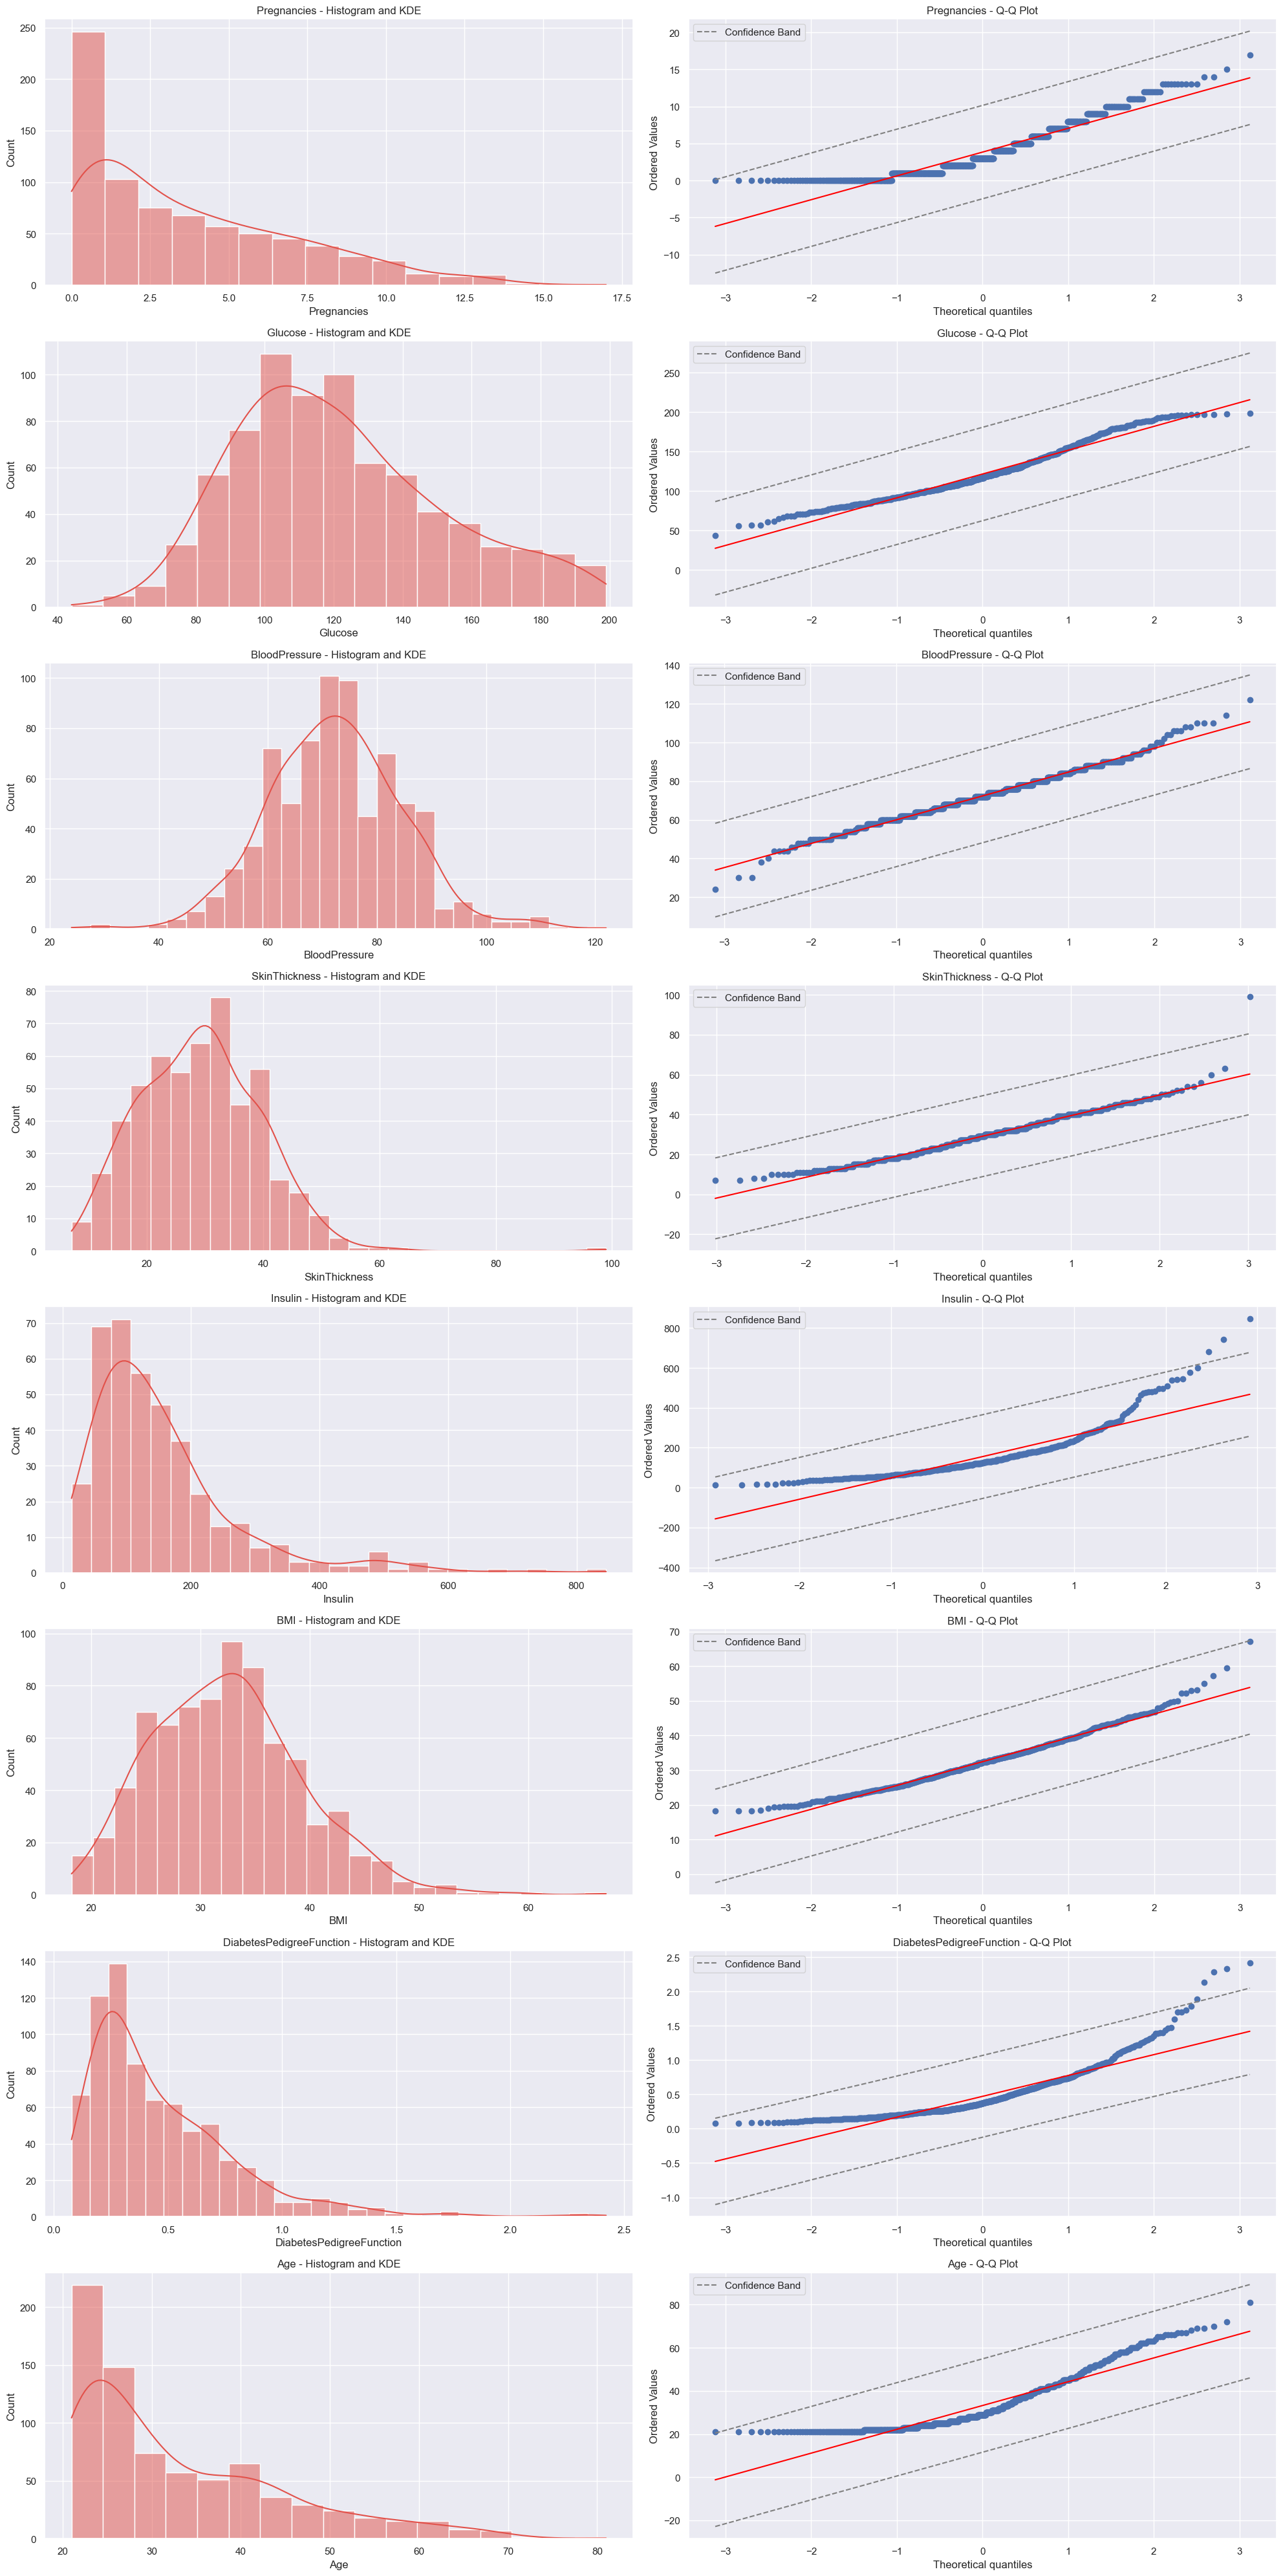

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from matplotlib.gridspec import GridSpec


def viz_hist_qq(df, feature_names):

    # Create a figure with a specified size
    fig = plt.figure(figsize=(20, 40))  # This initial size can be adjusted

    n = len(feature_names)
    # Set the GridSpec layout
    gs = GridSpec(n, 2, figure=fig, height_ratios=[1]*n, width_ratios=[1, 1])  # Adjust ratios as needed

    # Set the style and palette
    sns.set(font_scale=3)
    sns.set_theme(style="darkgrid")
    sns.set_palette("Spectral")

    # Loop through each feature and create the plots
    for i, name in enumerate(feature_names):
        # Plot the histogram with KDE on the left column
        ax_hist = fig.add_subplot(gs[i, 0])
        # sns.histplot(data=df, x=name, hue="Outcome", kde=True, ax=ax_hist, palette="RdBu")
        sns.histplot(data=df, x=name, kde=True, ax=ax_hist, palette="RdBu")
        ax_hist.set_title(f'{name} - Histogram and KDE')
        
        # Plot the Q-Q plot on the right column with confidence bands
        ax_qq = fig.add_subplot(gs[i, 1])
        
        stats.probplot(df[name].dropna(), dist="norm", plot=ax_qq)
        
        # Calculate the quantiles and fit line for all data
        osm, osr = stats.probplot(df[name].dropna(), dist="norm")[0]
        slope, intercept, r = stats.probplot(df[name].dropna(), dist="norm")[1]
        
        # Calculate the confidence bands
        n = len(df[name].dropna())
        se_line = slope * np.sqrt(1 + (1/n) + (osm**2 / ((n - 1) * np.var(df[name].dropna()))))
        confidence_level = 0.95
        z = stats.norm.ppf(1 - (1 - confidence_level) / 2)
        lower_band = intercept + slope * osm - z * se_line
        upper_band = intercept + slope * osm + z * se_line

        # Plot the confidence bands
        ax_qq.plot(osm, lower_band, linestyle='--', color='gray', label='Confidence Band')
        ax_qq.plot(osm, upper_band, linestyle='--', color='gray')

        ax_qq.get_lines()[1].set_color('red')  # Line of best fit
        ax_qq.set_title(f'{name} - Q-Q Plot')
        ax_qq.legend()

    # Adjust layout to fit plots within the figure area
    plt.tight_layout()
    plt.show()

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
viz_hist_qq(df, features)

# Part 2

### Data Spliting

In [16]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'Target' is your target variable

# Split the data into features (X) and target (t)
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train into a single DataFrame
df_train = pd.concat([X_train, y_train.loc[X_train.index]], axis=1)

# Rename the target column
df_train.rename(columns={y_train.name: 'Target'}, inplace=True) 


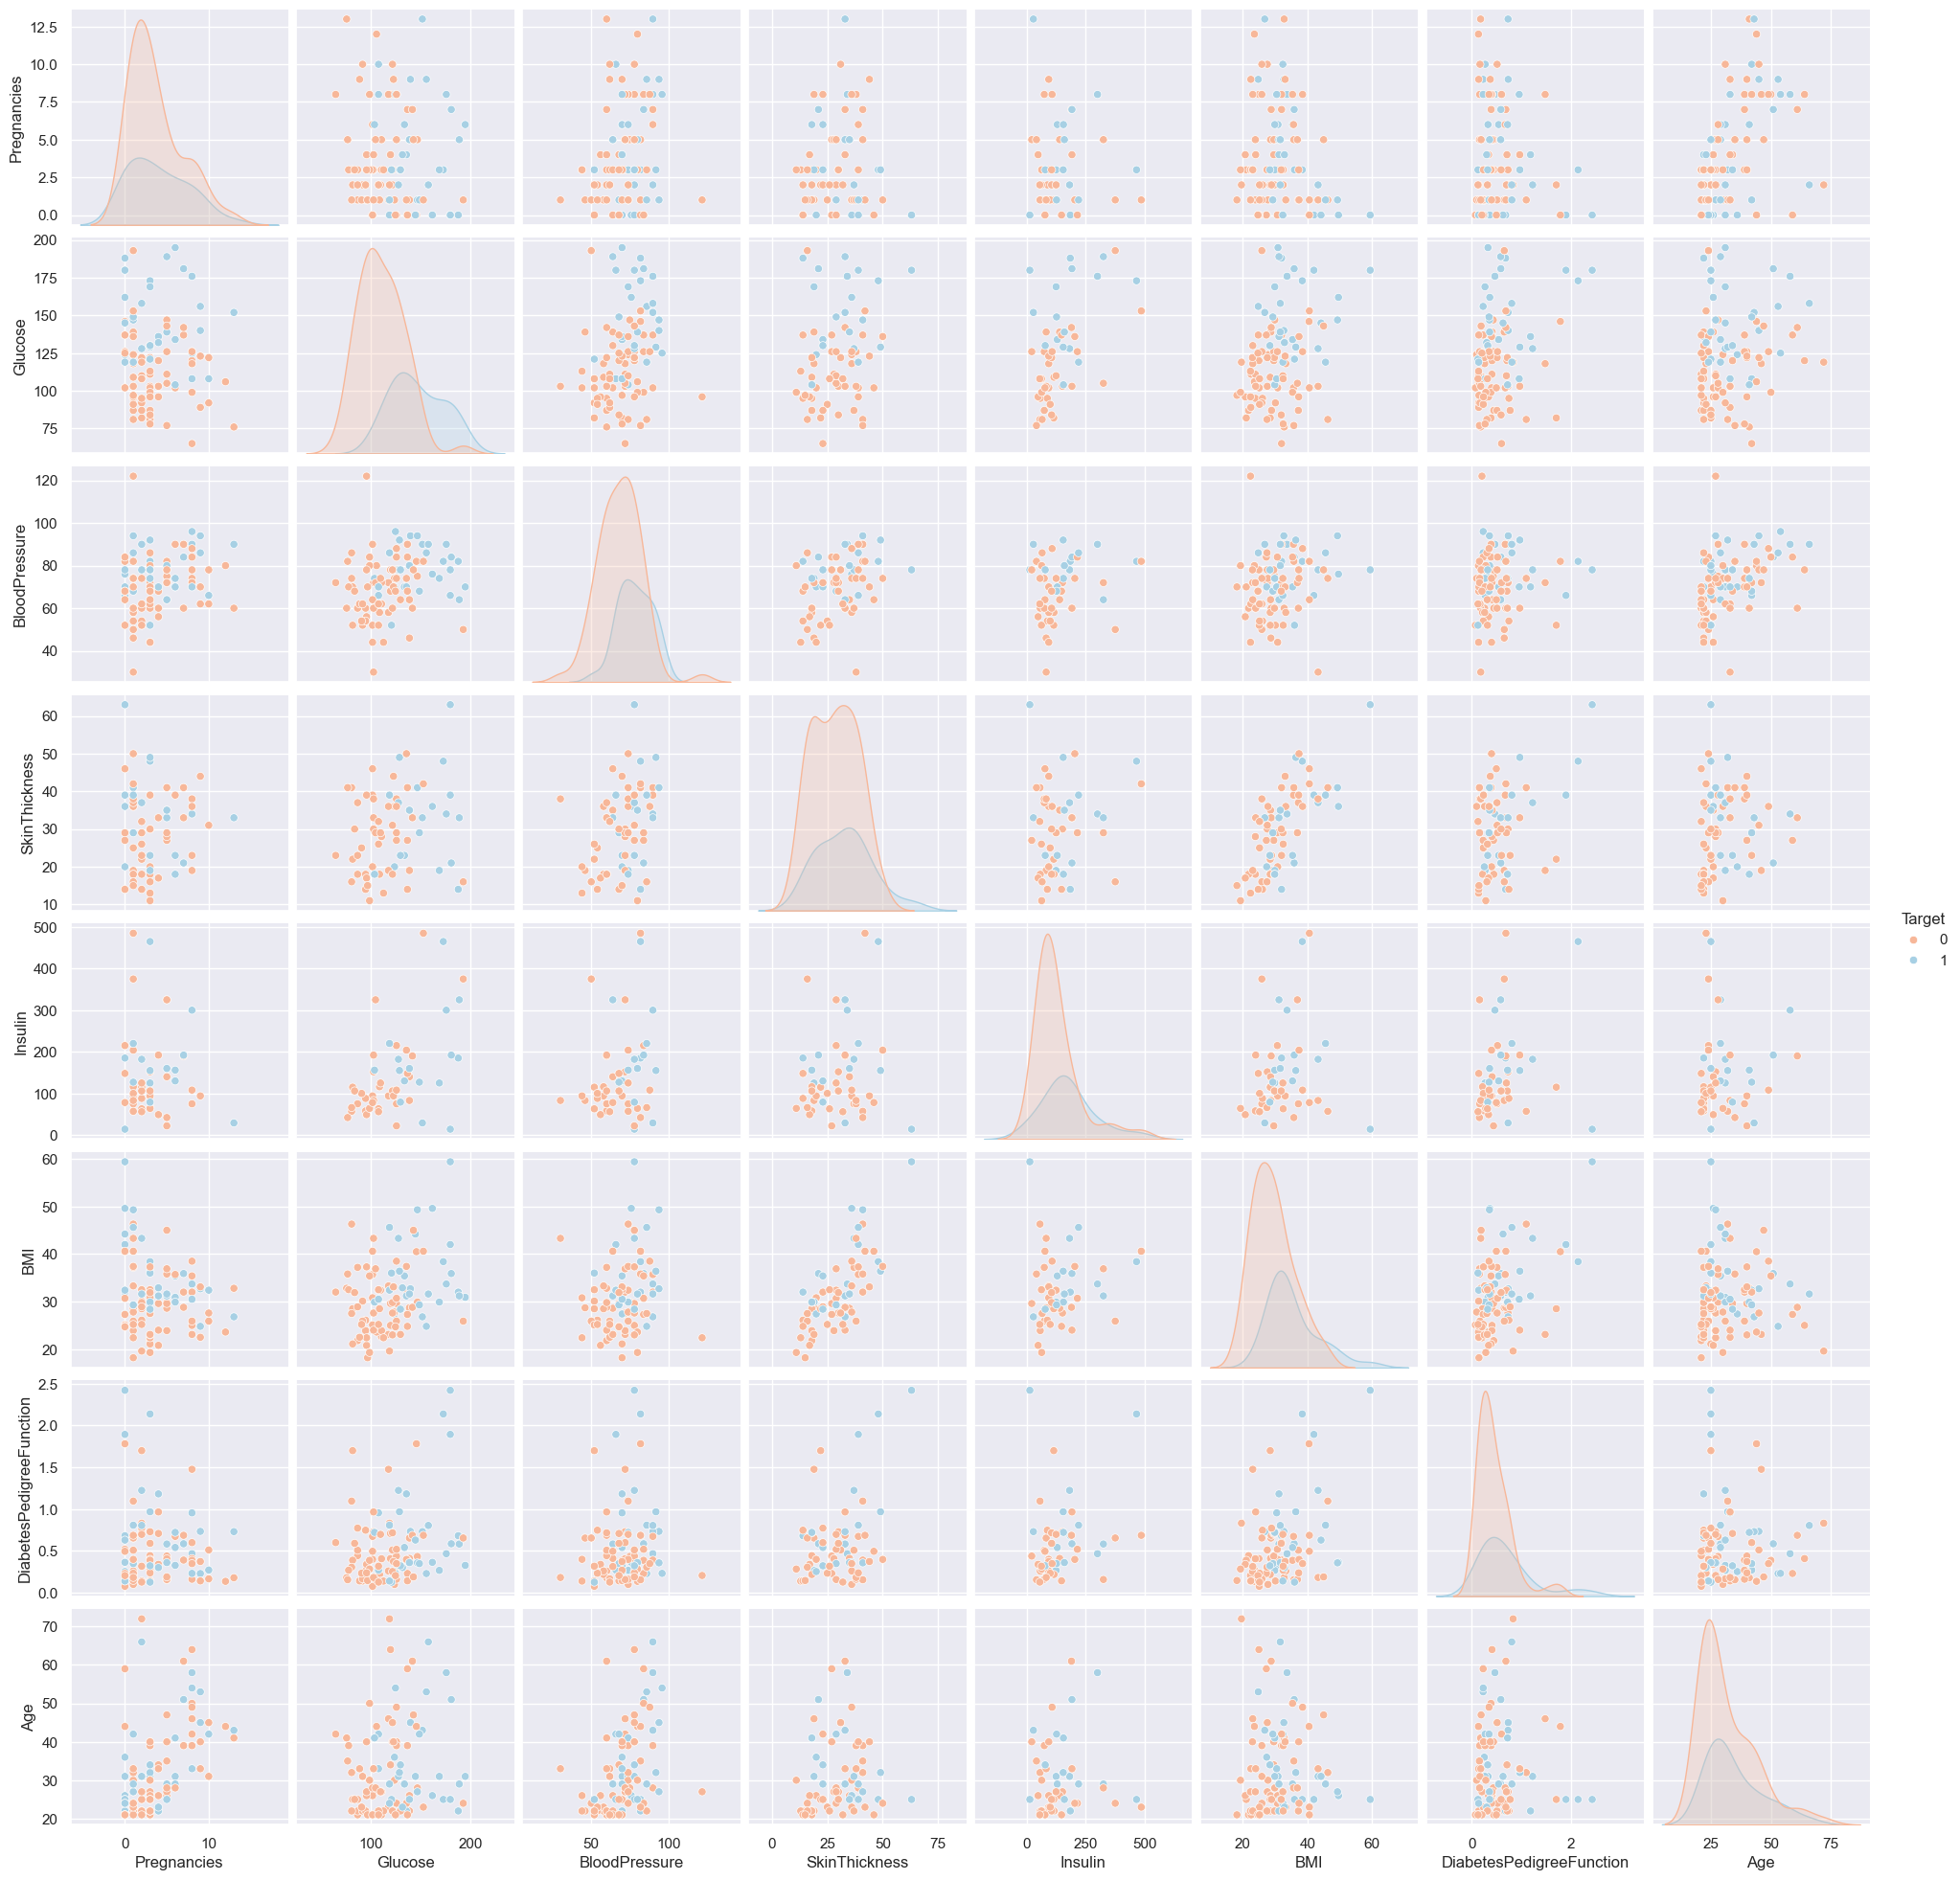

In [24]:
def viz_pairplot(data, features, hue_var = 'Target'):

    sns.pairplot(data.sample(100, random_state=42), vars=features, hue=hue_var, palette='RdBu')
    plt.show()
    
# Select desired features
features = ['Pregnancies',
            'Glucose',
            'BloodPressure',
            'SkinThickness',
            'Insulin',
            'BMI',
            'DiabetesPedigreeFunction',
            'Age']

    
viz_pairplot(df_train, features)

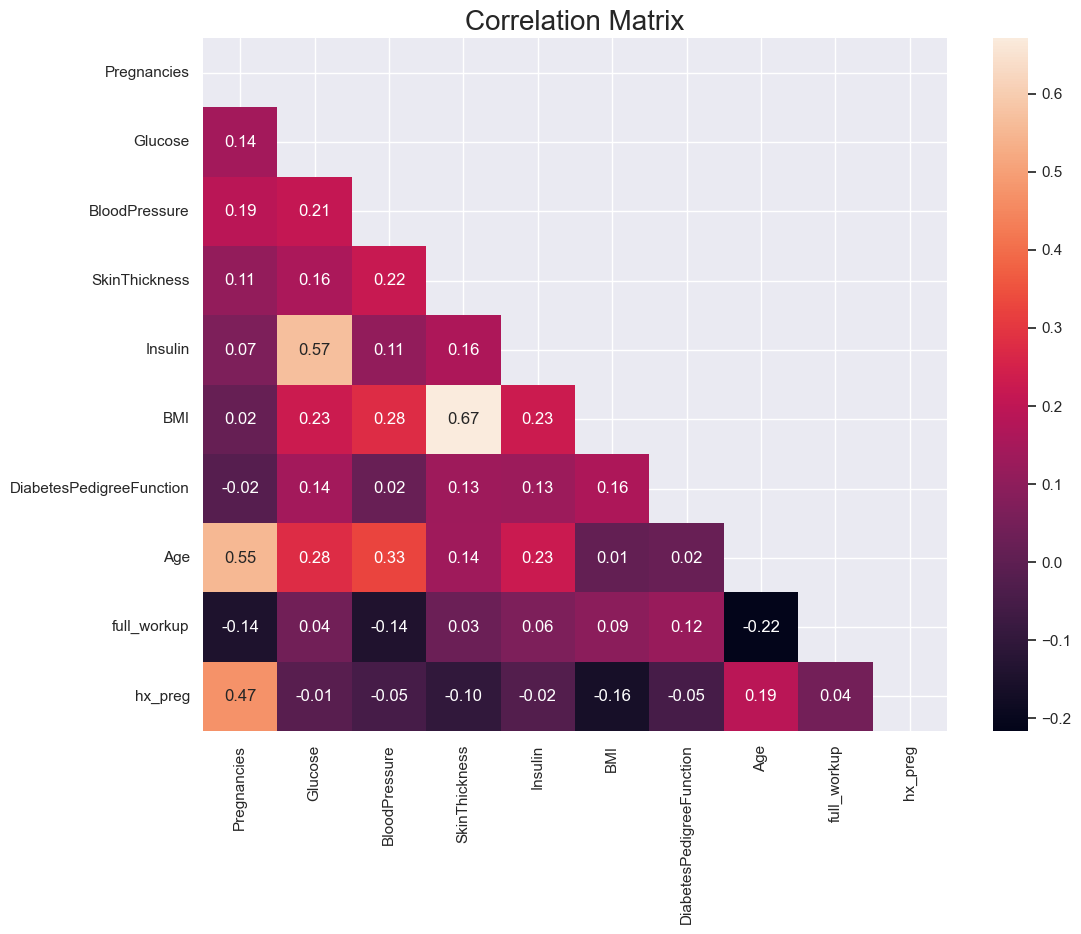

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,full_workup,hx_preg
Pregnancies,1.00,0.14,0.19,0.11,0.07,0.02,-0.02,0.55,-0.14,0.47
Glucose,0.14,1.00,0.21,0.16,0.57,0.23,0.14,0.28,0.04,-0.01
BloodPressure,0.19,0.21,1.00,0.22,0.11,0.28,0.02,0.33,-0.14,-0.05
SkinThickness,0.11,0.16,0.22,1.00,0.16,0.67,0.13,0.14,0.03,-0.10
Insulin,0.07,0.57,0.11,0.16,1.00,0.23,0.13,0.23,0.06,-0.02
BMI,0.02,0.23,0.28,0.67,0.23,1.00,0.16,0.01,0.09,-0.16
DiabetesPedigreeFunction,-0.02,0.14,0.02,0.13,0.13,0.16,1.00,0.02,0.12,-0.05
Age,0.55,0.28,0.33,0.14,0.23,0.01,0.02,1.00,-0.22,0.19
full_workup,-0.14,0.04,-0.14,0.03,0.06,0.09,0.12,-0.22,1.00,0.04
hx_preg,0.47,-0.01,-0.05,-0.10,-0.02,-0.16,-0.05,0.19,0.04,1.00


In [27]:
def corr_heatmap(data):
    
    corr = data.corr().round(2)

    fig,ax = plt.subplots(figsize=[12,9])
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(data.corr(), annot=True, mask = mask, fmt = '.2f', ax=ax)
    ax.set_title("Correlation Matrix", fontsize=20)
    plt.show()
    
    return corr

corr_heatmap(X_train)

#### Observations and Insights:
- No Extremely High Correlations (> 0.8): None of the features have extremely high correlations with each other, which is a good sign. It indicates that multicollinearity may not be a significant issue, and each feature provides somewhat distinct information.
- Balanced Relationships: The correlations suggest that most features capture different aspects of the data, which can be beneficial for building a more comprehensive model.
- Some features, like Pregnancies and BMI, or BloodPressure and DiabetesPedigreeFunction, have very low correlations, indicating that they are likely capturing very different aspects of health.



### Normality Test:
Shapiro-Wilk Test to evaluate normal distribution of features

In [20]:
from scipy.stats import shapiro, kstest, anderson

# Select desired features
features = ['Pregnancies',
            'Glucose',
            'BloodPressure',
            'SkinThickness',
            'Insulin',
            'BMI',
            'DiabetesPedigreeFunction',
            'Age']

def normality_tests(df, features):
    # Create a DataFrame to store results
    results = pd.DataFrame(columns=['Skewness', 'Kurtosis', 'Shapiro_p_val', 'KS_p_val', 'Anderson_Stat', 'Anderson_CV_1%'])

    for feature in features:
        # Calculate skewness and kurtosis
        skewness = df[feature].skew()
        kurtosis = df[feature].kurtosis()

        # Perform Shapiro-Wilk Test
        shapiro_stat, shapiro_p_val = shapiro(df[feature].dropna())

        # Perform Kolmogorov-Smirnov Test
        ks_stat, ks_p_val = kstest(df[feature].dropna(), 'norm')

        # Perform Anderson-Darling Test
        anderson_result = anderson(df[feature].dropna(), dist='norm')
        anderson_stat = anderson_result.statistic
        anderson_cv_1 = anderson_result.critical_values[-1]  # Get the critical value for 1%

        # Append the results to the DataFrame
        results.loc[feature] = [skewness, kurtosis, shapiro_p_val, ks_p_val, anderson_stat, anderson_cv_1]

    return results


normality_tests(df_train, features)

,Skewness,Kurtosis,Shapiro_p_val,KS_p_val,Anderson_Stat,Anderson_CV_1%
Pregnancies,0.935022,0.321411,2.093426e-19,4.497513e-295,18.310900,1.085
Glucose,0.565234,-0.128015,3.029513e-10,0.000000e+00,6.045150,1.085
BloodPressure,0.004361,0.911992,1.981592e-03,0.000000e+00,1.083105,1.085
SkinThickness,0.240065,-0.418198,2.146176e-04,0.000000e+00,1.402213,1.082
Insulin,2.316632,7.171948,2.139797e-20,0.000000e+00,17.844918,1.079
BMI,0.659930,1.029291,1.258120e-08,0.000000e+00,2.086490,1.085
DiabetesPedigreeFunction,2.094005,6.541286,1.043625e-25,1.161082e-162,25.038215,1.085
Age,1.181449,0.928455,5.889331e-22,0.000000e+00,23.836830,1.085


In [21]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.0,3.742671,3.313264,0.000,1.0000,3.0000,6.00000,17.00
Glucose,609.0,121.847291,30.225545,44.000,100.0000,118.0000,139.00000,199.00
BloodPressure,590.0,72.238983,12.343231,24.000,64.0000,72.0000,80.00000,122.00
SkinThickness,438.0,28.595890,9.960502,8.000,21.0000,28.5000,36.00000,63.00
Insulin,324.0,154.330247,119.818408,14.000,78.0000,120.0000,183.25000,846.00
BMI,607.0,32.352224,6.975458,18.200,27.3000,32.0000,36.50000,67.10
DiabetesPedigreeFunction,614.0,0.469168,0.336847,0.078,0.2415,0.3725,0.61375,2.42
Age,614.0,32.907166,11.503437,21.000,24.0000,29.0000,40.00000,81.00
full_workup,614.0,0.524430,0.499810,0.000,0.0000,1.0000,1.00000,1.00
hx_preg,614.0,0.851792,0.355596,0.000,1.0000,1.0000,1.00000,1.00


In [ ]:

# def apply_boxcox_transformation(df, features):
#     """
#     Applies the Box-Cox transformation to specified features in the DataFrame.

#     Parameters:
#     df (pd.DataFrame): The input DataFrame containing the data.
#     features (list of str): List of column names to apply the Box-Cox transformation to.

#     Returns:
#     pd.DataFrame: A new DataFrame with Box-Cox transformed features.
#     dict: A dictionary of lambda values used for each feature during transformation.
#     """
    
#     # Initialize an empty DataFrame to store the transformed features
#     transformed_df = pd.DataFrame()
    
#     # Initialize a dictionary to store the lambda values
#     lambda_dict = {}

#     # Apply Box-Cox transformation to each feature
#     for feature in features:
#         # Shift the data if necessary to ensure all values are positive
#         shifted_feature = df[feature] + 1e-6 if (df[feature] <= 0).any() else df[feature]
        
#         # Apply Box-Cox transformation
#         transformed_feature, lambda_val = boxcox(shifted_feature)
        
#         # Store the transformed feature in the new DataFrame
#         transformed_df[feature] = transformed_feature
        
#         # Store the lambda value for this feature
#         lambda_dict[feature] = lambda_val

#     return transformed_df, lambda_dict

# # Select desired features
# features = ['Pregnancies',
#             'Glucose',
#             'BloodPressure',
#             'SkinThickness',
#             'Insulin',
#             'BMI',
#             'DiabetesPedigreeFunction',
#             'Age']

# # Apply Box-Cox transformation to the features
# X_train_bc, lambda_dict = apply_boxcox_transformation(X_train, features)


### Data Imputation:

In [54]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

features = [
            'Glucose',
            'BloodPressure',
            'SkinThickness',
            'Insulin',
            'BMI',
            'DiabetesPedigreeFunction',
            'Age']
# Initialize MICE imputer
mice_imputer = IterativeImputer(max_iter=10, random_state=42)

# Apply MICE imputation to the selected features
X_train_imputed = pd.DataFrame(mice_imputer.fit_transform(X_train[features]), 
                               columns=features)

# If you have additional features that don't require imputation, combine them
X_train_imputed = pd.concat([X_train_imputed, X_train.drop(columns=features)], axis=1)


In [55]:
X_train_imputed.describe()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,full_workup,hx_preg
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000
mean,121.792297,72.173922,28.376876,150.884029,32.341157,0.469168,32.907166,3.742671,0.52443,0.851792
std,30.138441,12.144399,9.070329,98.706800,6.938030,0.336847,11.503437,3.313264,0.49981,0.355596
min,44.000000,24.000000,8.000000,-24.195217,18.200000,0.078000,21.000000,0.000000,0.00000,0.000000
25%,100.000000,64.000000,21.999622,88.084148,27.325000,0.241500,24.000000,1.000000,0.00000,1.000000
50%,118.000000,72.000000,28.000000,130.000000,32.000000,0.372500,29.000000,3.000000,1.00000,1.000000
75%,139.000000,80.000000,34.946108,184.745141,36.375000,0.613750,40.000000,6.000000,1.00000,1.000000
max,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,17.000000,1.00000,1.000000


In [34]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,full_workup,hx_preg
count,614.000000,609.000000,590.000000,438.000000,324.000000,607.000000,614.000000,614.000000,614.00000,614.000000
mean,3.742671,121.847291,72.238983,28.595890,154.330247,32.352224,0.469168,32.907166,0.52443,0.851792
std,3.313264,30.225545,12.343231,9.960502,119.818408,6.975458,0.336847,11.503437,0.49981,0.355596
min,0.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000,0.00000,0.000000
25%,1.000000,100.000000,64.000000,21.000000,78.000000,27.300000,0.241500,24.000000,0.00000,1.000000
50%,3.000000,118.000000,72.000000,28.500000,120.000000,32.000000,0.372500,29.000000,1.00000,1.000000
75%,6.000000,139.000000,80.000000,36.000000,183.250000,36.500000,0.613750,40.000000,1.00000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.00000,1.000000


In [63]:
import numpy as np

def replace_outliers_with_threshold(df, features, small_value=1e-6):
    """
    Replaces all values in the specified features of the DataFrame that are below -3 SD
    with the -3 SD threshold value and those above +3 SD with the +3 SD threshold value for that feature.
    Ensures all values are positive by adding a small value if necessary.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    features (list of str): List of column names to check and replace values.
    small_value (float): The small positive value to ensure all values are positive.

    Returns:
    pd.DataFrame: The DataFrame with values replaced below -3 SD or above +3 SD thresholds.
    """
    
    for feature in features:
        # Calculate the mean and standard deviation for the feature
        mean_val = df[feature].mean()
        std_dev = df[feature].std()

        # Calculate the -3 SD and +3 SD thresholds
        lower_threshold = mean_val - 3 * std_dev
        upper_threshold = mean_val + 3 * std_dev

        # Replace values below -3 SD with the lower threshold and above +3 SD with the upper threshold
        df[feature] = df[feature].apply(lambda x: max(min(x, upper_threshold), lower_threshold))

        # Ensure all values are positive by adding a small value
        df[feature] = df[feature] + small_value
    
    return df

# List of features to check and replace values
features_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Apply the replacement to the imputed DataFrame
X_train_imputed_fixed = replace_outliers_with_threshold(X_train_imputed, features_to_check)

# Now you can safely apply Box-Cox transformation
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

def apply_yeo_johnson_transformation(df, features):
    """
    Applies the Yeo-Johnson transformation to specified non-binary features in the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    features (list of str): List of column names to apply the Yeo-Johnson transformation to.

    Returns:
    pd.DataFrame: A new DataFrame with Yeo-Johnson transformed features.
    dict: A dictionary of lambda values used for each feature during transformation.
    """
    
    transformed_df = pd.DataFrame(index=df.index)
    lambda_dict = {}

    pt = PowerTransformer(method='yeo-johnson')

    for feature in features:
        # Apply Yeo-Johnson transformation
        transformed_feature = pt.fit_transform(df[feature].values.reshape(-1, 1))
        transformed_df[feature] = transformed_feature.flatten()
        lambda_dict[feature] = pt.lambdas_

    return transformed_df, lambda_dict

# Apply Yeo-Johnson transformation to the imputed dataset
X_train_yj, lambda_dict = apply_yeo_johnson_transformation(X_train_imputed_fixed, features_to_check)

# Combine the transformed features with any binary features (if applicable)
binary_features = X_train_imputed.drop(columns=features_to_check)
X_train_transformed = pd.concat([X_train_yj, binary_features], axis=1)

# Display the transformed DataFrame and the lambda values
print(X_train_transformed.head())
print(lambda_dict)

from sklearn.preprocessing import StandardScaler

def apply_scaling(df, features):
    """
    Applies scaling transformation to specified features in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    features (list of str): List of column names to apply the scaling transformation to.

    Returns:
    pd.DataFrame: A new DataFrame with scaled features.
    scaler: The fitted scaler object, to apply the same transformation to the test data.
    """
    
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[features])
    scaled_df = pd.DataFrame(scaled_features, columns=features, index=df.index)
    
    return scaled_df, scaler

# Apply scaling to the imputed and transformed training data
X_train_scaled, scaler = apply_scaling(X_train_transformed, features_to_check)

# Combine the scaled features with any binary features (if applicable)
binary_features = X_train_transformed.drop(columns=features_to_check)
X_train_final = pd.concat([X_train_scaled, binary_features], axis=1)


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.849143 -1.374134      -0.471985      -0.204273 -1.003597 -0.153111   
1    -0.808848 -0.230052       0.826211      -0.435942 -0.213225 -0.553661   
2          NaN  0.651823      -2.218789      -1.043205 -0.757765 -0.471001   
3    -0.808848  1.263111      -1.875955      -0.759011  1.018733 -1.719276   
4    -1.588656  0.500844       0.659076       0.963286  2.406354  1.848039   

   DiabetesPedigreeFunction       Age  full_workup  hx_preg  
0                 -0.402325 -1.477177          0.0      1.0  
1                  1.911774  1.401108          0.0      1.0  
2                  0.918791 -1.243641          NaN      NaN  
3                 -0.691230  1.846816          1.0      1.0  
4                 -0.791499  1.229275          1.0      0.0  
{'Pregnancies': array([0.16568552]), 'Glucose': array([0.09661752]), 'BloodPressure': array([0.95088931]), 'SkinThickness': array([0.63333146]), 'Insulin': arr

In [65]:
from sklearn.preprocessing import StandardScaler

def apply_scaling(df, features):
    """
    Applies scaling transformation to specified features in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    features (list of str): List of column names to apply the scaling transformation to.

    Returns:
    pd.DataFrame: A new DataFrame with scaled features.
    scaler: The fitted scaler object, to apply the same transformation to the test data.
    """
    
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[features])
    scaled_df = pd.DataFrame(scaled_features, columns=features, index=df.index)
    
    return scaled_df, scaler

# Apply scaling to the imputed and transformed training data
X_train_scaled, scaler = apply_scaling(X_train_transformed, features_to_check)

# Combine the scaled features with any binary features (if applicable)
binary_features = X_train_transformed.drop(columns=features_to_check)
X_train_final = pd.concat([X_train_scaled, binary_features], axis=1)


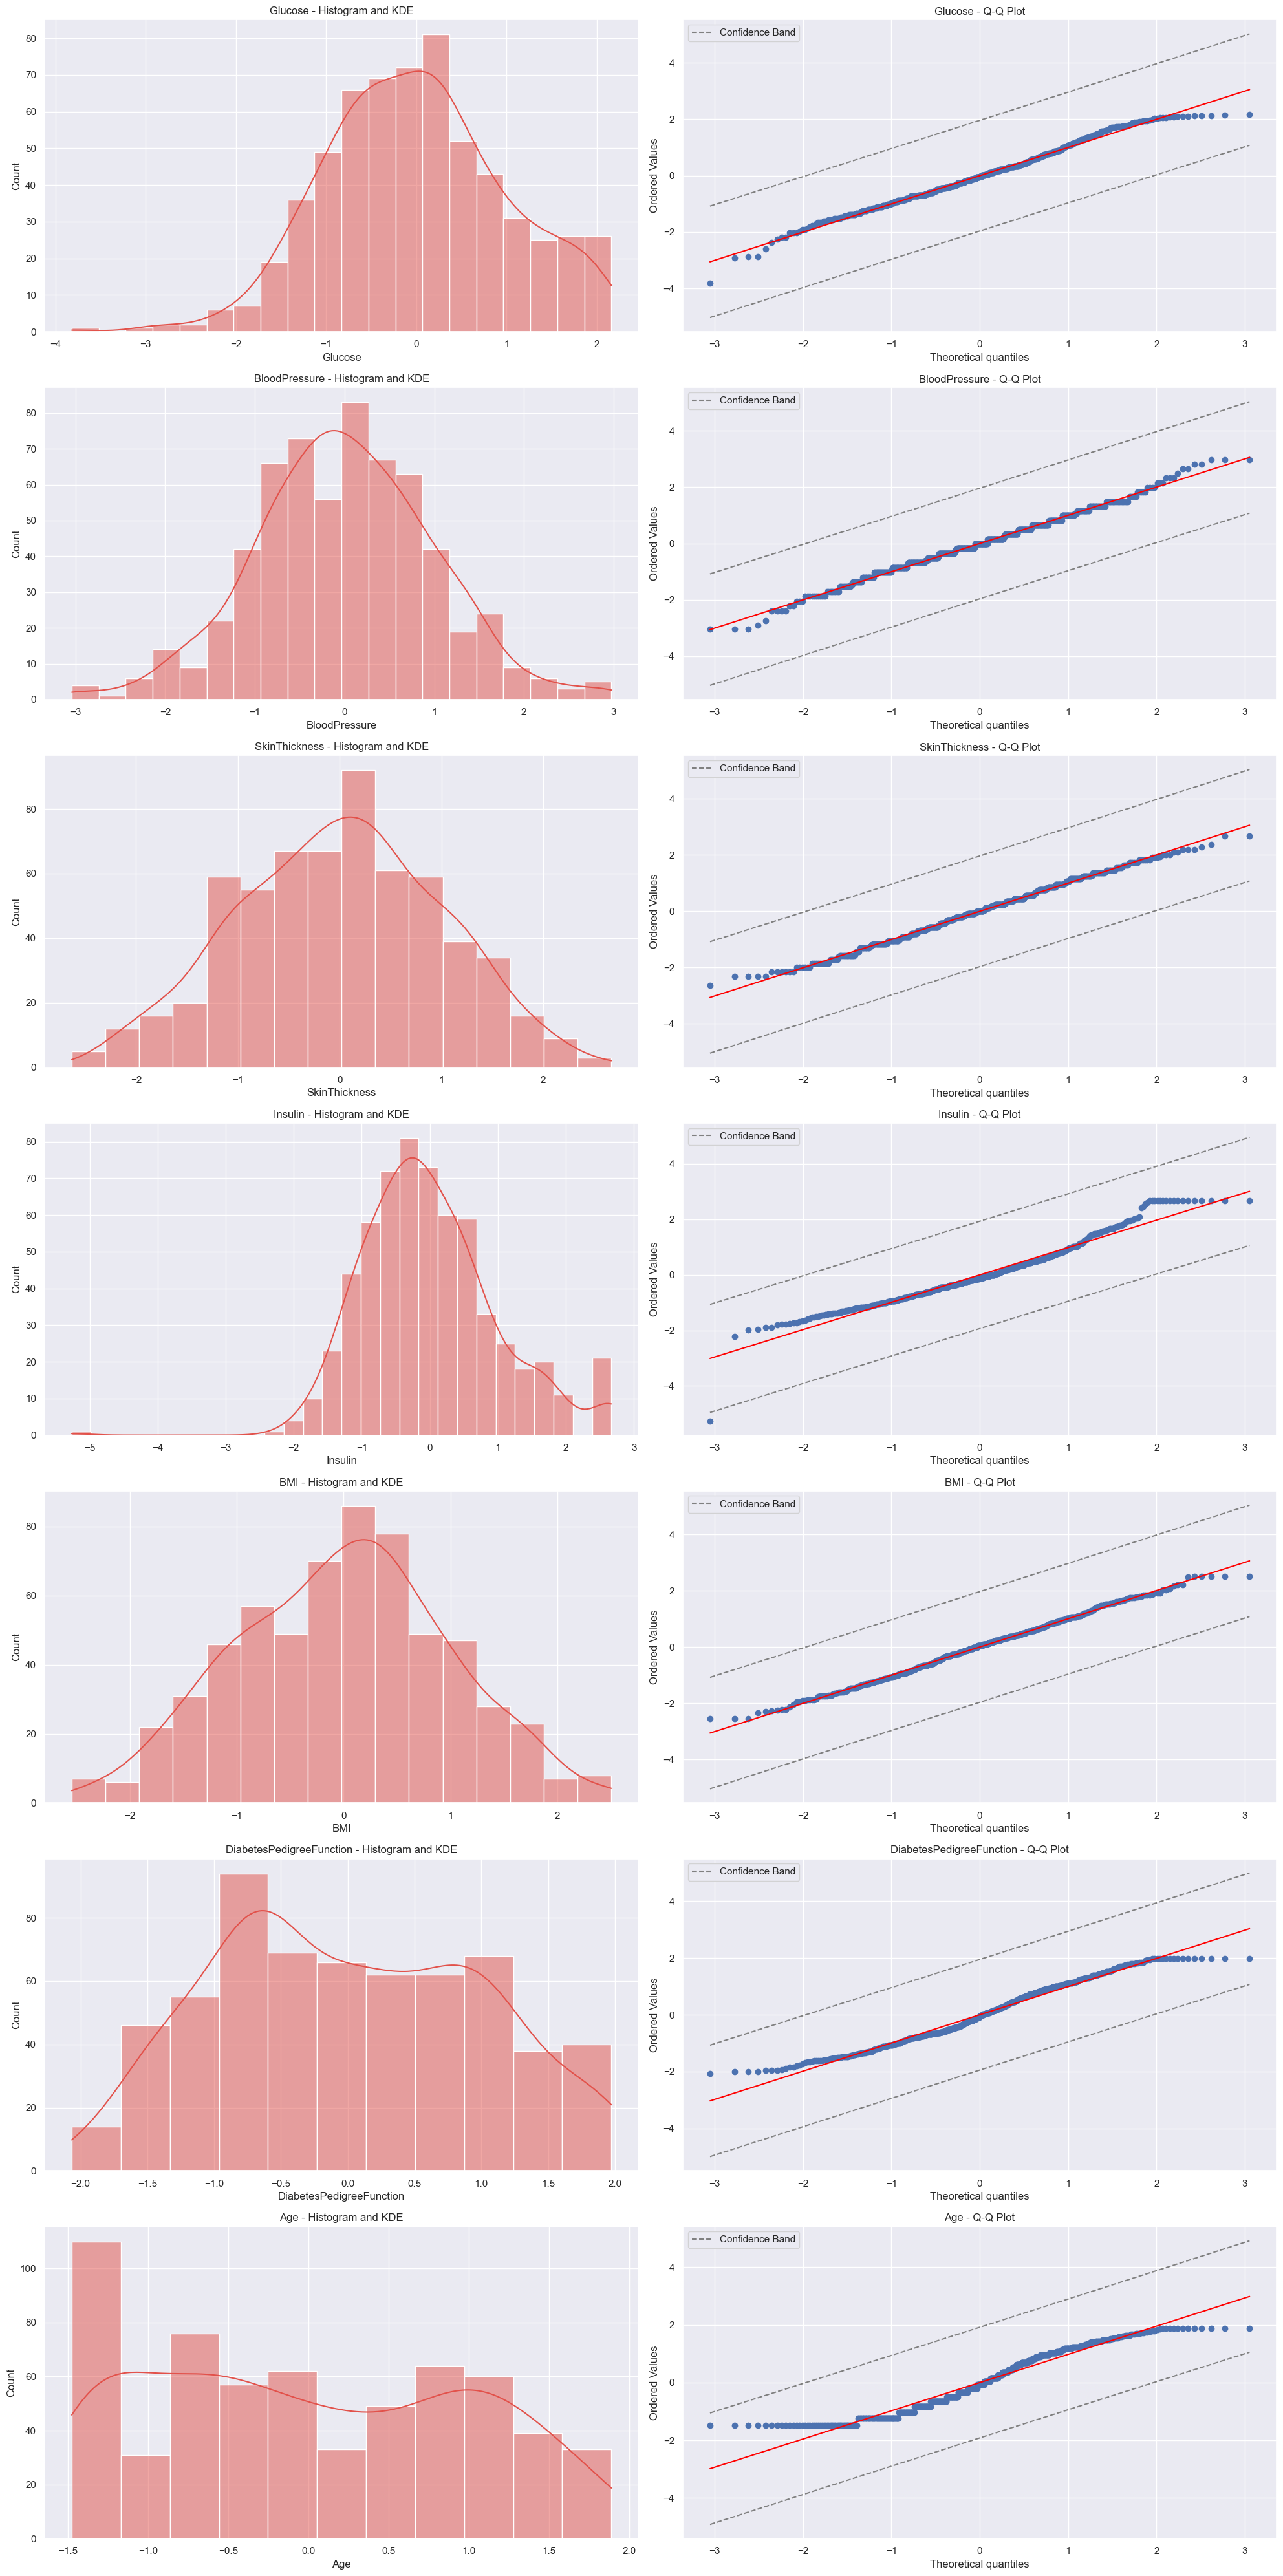

In [66]:
viz_hist_qq(X_train_final, features)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer  # Needed to enable IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.base import TransformerMixin, BaseEstimator
import pandas as pd
import numpy as np

# Custom Transformer to replace outliers with thresholds
class ReplaceOutliersWithThreshold(TransformerMixin, BaseEstimator):
    def __init__(self, features, small_value=1e-6):
        self.features = features
        self.small_value = small_value

    def fit(self, X, y=None):
        self.thresholds_ = {}
        for feature in self.features:
            mean_val = X[feature].mean()
            std_dev = X[feature].std()
            lower_threshold = mean_val - 3 * std_dev
            upper_threshold = mean_val + 3 * std_dev
            self.thresholds_[feature] = (lower_threshold, upper_threshold)
        return self

    def transform(self, X, y=None):
        X = X.copy()
        for feature in self.features:
            lower_threshold, upper_threshold = self.thresholds_[feature]
            X[feature] = X[feature].apply(lambda x: max(min(x, upper_threshold), lower_threshold))
            X[feature] = X[feature] + self.small_value
        return X

# List of features to impute and transform
features_to_transform = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Numeric pipeline (imputation -> outlier handling -> transformation -> scaling)
numeric_pipeline = Pipeline(steps=[
    ('imputation', IterativeImputer(max_iter=10, random_state=42)),
    ('outlier_replacement', ReplaceOutliersWithThreshold(features=features_to_transform)),
    ('transformation', PowerTransformer(method='yeo-johnson')),
    ('scaling', StandardScaler())
])

# Combine numeric pipeline in a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_pipeline, features_to_transform)
])

# Full pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit the pipeline on the training data
full_pipeline.fit(X_train)

# Transform the training data
X_train_final = full_pipeline.transform(X_train)

# If you want to also keep binary features
binary_features = X_train.drop(columns=features_to_transform)
X_train_final = pd.concat([pd.DataFrame(X_train_final, columns=features_to_transform, index=X_train.index), 
                           binary_features], axis=1)

# # Apply the same pipeline to the test data
# X_test_final = full_pipeline.transform(X_test)
# binary_features_test = X_test.drop(columns=features_to_transform)
# X_test_final = pd.concat([pd.DataFrame(X_test_final, columns=features_to_transform, index=X_test.index), 
#                           binary_features_test], axis=1)

# # Now X_train_final and X_test_final are ready for model training and evaluation
# print(X_train_final.head())
